# Project 1: SAT & ACT Analysis

SAT and ACT data analysis in 2016 and 2018 years by states of the United States of America.

## Problem Statement

The College Board released a new version of the Standardized Tests (SAT). The New SAT made its debut in March 2016 and impacts students in the class of 2017 or younger. We aim to analyze the data about ACT and SAT scores and participation rate in 2017 and 2018 years, the major trends and difference.

## Executive Summary

Many students and parents begin the college prep process by comparing the ACT and SAT tests. The SAT and ACT generally cover the same topics. Both ACT and SAT scores are used for college admissions decisions and awarding merit-based scholarships. Most colleges do not prefer one test over the other. Neither the SAT or ACT is harder than the other. Different students tend to do better on one test over the other. Students are increasingly taking both the SAT and ACT . Changes made to the SAT in 2016 have made it easier than ever to prep for both tests concurrently — and earn competitive scores on [both](https://www.princetonreview.com/college/sat-act)!

Let's explore some trends in ACT and SAT scores and participation rate.

### Contents:
- [2017 Data Import & Cleaning](#2017-Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Colorado, Illinois and North Carolina participation trends](#Colorado,-Illinois-and-North-Carolina-participation-trends)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

*All libraries used should be added here*

In [1]:
#Imports:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 2017 Data Import and Cleaning

#### 1. Read In SAT & ACT  Data

Read in the `sat_2017.csv` and `act_2017.csv` files and assign them to appropriately named pandas dataframes.

In [2]:
# Upload two csv files with information about SAT and ACT exam scores in 2017
sat_2017 = pd.read_csv('./data/sat_2017.csv')
act_2017 = pd.read_csv('./data/act_2017.csv')

#### 2. Display Data

Print the first 10 rows of each dataframe to your jupyter notebook

In [3]:
# First 10 rows of SAT exam scores in 2017 by states
sat_2017.head(10)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055
5,Colorado,11%,606,595,1201
6,Connecticut,100%,530,512,1041
7,Delaware,100%,503,492,996
8,District of Columbia,100%,482,468,950
9,Florida,83%,520,497,1017


In [4]:
# First 10 rows of ACT exam scores in 2017 by states
act_2017.head(10)

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,California,31%,22.5,22.7,23.1,22.2,22.8
6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


#### 3. Verbally Describe Data

Take your time looking through the data and thoroughly describe the data in the markdown cell below. 

Answer: ACT and SAT ACT and SAT are standardized entrance exams for the United States university admissions. These data give average SAT and ACT scores by state, as well as participation rates, for the graduating class of 2017.
__________________________________________________________

**SAT** dataset consists of 51 rows and 5 columns. Each row represents information about one state (50 in total and one district). 
- Column 'participation_SAT17' gives information about the rate of participation in 2017 by states in percentage.
- Columns 'reading_writing_SAT17' (Evidence-Based Reading and Writing) and 'math_SAT17' are two subtests of the exam. Each subtest is scored between 200 and 800.
- Column 'total_SAT17' is a sum of 'reading_writing_SAT17' and 'math_SAT17' scores which range between 400 and 1600.

______________________________________________________________________________________________________

**ACT** dataset consists of 52 rows and 7 columns. Each row represents information about one state (50 in total and one district) and one row is National average scores.
- Column 'participation_ACT17' gives information about the rate of participation in 2017 by states in percentage.
- Columns 'english_ACT17', 'math_ACT17', 'reading_ACT17', 'science_ACT17' represent four academic skill areas: English, mathematics, reading, and science reasoning. Each section of the text is individually scored on a scale of 1–36.
- Column 'composite_ACT17', a composite score which is the rounded whole number average of the four sections.

#### 4a. Does the data look complete? 

Answer: SAT and ACT datasets have information about all main subtests by states. sat_2017 dataset doesn't have national information in comparison with act 2017 dataset. No datasets contain any missing value.

#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**

Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

Answer:
SAT 2017: The lowest possible score on either section is 200 points. But the dataset has mimimum score of 52 in 'math' column.

ACT 2017: The lowest possible score on the ACT is 1. The minimal score in ACT dataset is 2.3 in section 'Science', it is possible but very distinct from other columns min. score.

#### 4c. Fix any errors you identified

**The data is available** so there's no need to guess or calculate anything. If you didn't find any errors, continue to the next step.

In [5]:
# Finding the minimum score error in the SAT 2017 dataset
sat_2017[sat_2017.Math == sat_2017.Math.min()][["State","Math"]]
# The wrong score is in Maryland state

,State,Math
20,Maryland,52


In [6]:
# Fixing the score for math for Maryland
true_score = sat_2017.iloc[20,4] - sat_2017.iloc[20,2]
sat_2017.iloc[20,3] = true_score
sat_2017.iloc[[20]]

,State,Participation,Evidence-Based Reading and Writing,Math,Total
20,Maryland,69%,536,524,1060


In [7]:
# Finding the minimum score error in the ACT 2017 dataset
act_2017[act_2017.Science == act_2017.Science.min()][["State","Science"]]
# The wrong score is in Maryland state again

,State,Science
21,Maryland,2.3


Looking at the source data [here](https://www.act.org/content/dam/act/unsecured/documents/cccr2017/ACT_2017-Average_Scores_by_State.pdf) and see the value for Science score is 23.2 

In [8]:
act_2017.iloc[21,5] = 23.2
act_2017.iloc[[21]]

,State,Participation,English,Math,Reading,Science,Composite
21,Maryland,28%,23.3,23.1,24.2,23.2,23.6


In [9]:
# Cheking 'Total' of each row in SAT 2017
sat_2017['my_total'] = sat_2017.iloc[:,2:4].sum(axis=1)

In [10]:
# There is some discrepancy in 'Total' column, but the source information is the same
# We will keep the original dataset with source information
sat_2017['difference'] = sat_2017['my_total'] - sat_2017['Total']
print(f"Number of rows with discrepancy in 'Total' column {sat_2017[sat_2017['difference']!=0]['difference'].count()}")
sat_2017[sat_2017['difference']!=0]

Number of rows with discrepancy in 'Total' column 15


,State,Participation,Evidence-Based Reading and Writing,Math,Total,my_total,difference
6,Connecticut,100%,530,512,1041,1042,1
7,Delaware,100%,503,492,996,995,-1
12,Idaho,93%,513,493,1005,1006,1
15,Iowa,2%,641,635,1275,1276,1
18,Louisiana,4%,611,586,1198,1197,-1
21,Massachusetts,76%,555,551,1107,1106,-1
22,Michigan,100%,509,495,1005,1004,-1
24,Mississippi,2%,634,607,1242,1241,-1
27,Nebraska,3%,629,625,1253,1254,1
32,New York,67%,528,523,1052,1051,-1


In [11]:
# Deleting columns which were created above
sat_2017 = sat_2017.drop(columns=['my_total', 'difference'])
sat_2017.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055


In [12]:
# We can not check the difference of 'Composite' column in ACT 2017 because the type is an object
act_2017['Composite'].dtype
# Will do it later after converting the type of data

dtype('O')

In [13]:
# Function for converting object rows into float
def to_float(row,start=0,end=-1):
    """
    Convert strings to float
    
    Parameters:
    row  - unhashable type,
    start (int) start of slicing to cut string
    end (int) end of slicing to cut string
    
    Returns:
    Convert strings to float
    """
    try:
        return float(row)
    except:
        return float(row[start:end])

# Function to apply functions to DataFrame
def df_column_apply(df,column_name,function):
    """
    Parameters: 
    df - DataFrame
    column_name - string
    function - function name or lambda
    
    Returns:
    DataFrame column with applied function to it
    """
    df[column_name] = df[column_name].apply(function)
    return df[column_name]

In [14]:
# Converting 'Composite' column in act_2017 from object to float
df_column_apply(act_2017,'Composite',to_float);
# Converting 'Participation' in both df to float, deleted '%' character 
df_column_apply(act_2017,'Participation',to_float);
df_column_apply(sat_2017,'Participation',to_float);

In [15]:
# Now we can check 'Total' of each row in ACT 2017
act_2017['my_total'] = round((act_2017.iloc[:,2:6].sum(axis=1))/4,1)

In [16]:
act_2017['difference'] = act_2017['my_total'] - act_2017['Composite']
act_2017[act_2017['difference']!=0].head()
# Each row in the dataset has a small difference, it can be a specific of calculation the composite score
# We will keep original source data

,State,Participation,English,Math,Reading,Science,Composite,my_total,difference
0,National,60.0,20.3,20.7,21.4,21.0,21.0,20.8,-0.2
1,Alabama,100.0,18.9,18.4,19.7,19.4,19.2,19.1,-0.1
2,Alaska,65.0,18.7,19.8,20.4,19.9,19.8,19.7,-0.1
3,Arizona,62.0,18.6,19.8,20.1,19.8,19.7,19.6,-0.1
4,Arkansas,100.0,18.9,19.0,19.7,19.5,19.4,19.3,-0.1


In [17]:
# Deleting columns which were created above
act_2017 = act_2017.drop(columns=['my_total', 'difference'])
act_2017.head(2)

,State,Participation,English,Math,Reading,Science,Composite
0,National,60.0,20.3,20.7,21.4,21.0,21.0
1,Alabama,100.0,18.9,18.4,19.7,19.4,19.2


#### 5. What are your data types? 
Display the data types of each feature. 

In [18]:
# Most of data are integer type, 'Participation' was converted into a float, 
# 'State' column is a string
sat_2017.dtypes

State                                  object
Participation                         float64
Evidence-Based Reading and Writing      int64
Math                                    int64
Total                                   int64
dtype: object

In [19]:
# Most of data are float, 'State' column is a string
act_2017.dtypes

State             object
Participation    float64
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

Answer:

#### 6. Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert participation rates to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [20]:
# Stated above from 67 cell

- Fix any individual values preventing other columns from being the appropriate type.

In [21]:
# Stated above from 67 cell

- Finish your data modifications by making sure the columns are now typed appropriately.

In [22]:
# Stated above from 67 cell

- Display the data types again to confirm they are correct.

In [23]:
# Stated above from 67 cell

#### 7. Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

In [24]:
# Making all characters in columns' names lowercase
sat_2017.columns = sat_2017.columns.str.lower()
act_2017.columns = act_2017.columns.str.lower()

# Changing names of columns to make them unique and informative
sat_2017.rename(columns = {'participation':'participation_SAT17',
                 'evidence-based reading and writing':'reading_writing_SAT17',
                 'math':'math_SAT17',
                 'total':'total_SAT17'},inplace=True)
sat_2017.head(2)

,state,participation_SAT17,reading_writing_SAT17,math_SAT17,total_SAT17
0,Alabama,5.0,593,572,1165
1,Alaska,38.0,547,533,1080


In [25]:
# Changing names of columns to make them unique and informative
act_2017.rename(columns={'participation':'participation_ACT17',
                         'english':'english_ACT17',
                         'math':'math_ACT17',
                         'reading':'reading_ACT17',
                         'science':'science_ACT17',
                         'composite':'composite_ACT17'},inplace=True)
act_2017.head(2)

,state,participation_ACT17,english_ACT17,math_ACT17,reading_ACT17,science_ACT17,composite_ACT17
0,National,60.0,20.3,20.7,21.4,21.0,21.0
1,Alabama,100.0,18.9,18.4,19.7,19.4,19.2


#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

|Feature|Type|Dataset|Description|
|---|---|---|---|
|state|object|act_2017|List of states and territories of the United States.|
|participation_ACT17|float64|act_2017|The share of high school graduates in a particular geographic entity who take the ACT, in percentages (%).|
|english_ACT17|float64|act_2017|The first section is the 45-minute English test covering usage/mechanics, sentence structure, and rhetorical skills. Scored on a scale of 1–36.|
|math_ACT17|float64|act_2017|The second section is a 60-minute, 60-question math test with the usual distribution of questions being approximately 14 covering pre-algebra, 10 elementary algebra, 9 intermediate algebra, 14 plane geometry, 9 coordinate geometry, and 4 elementary trigonometry questions. Scored on a scale of 1–36.|
|reading_ACT17|float64|act_2017|The reading section is a 35-minute, 40-question test that consists of four sections, three of which contain one long prose passage and second one contains two shorter prose passages. Scored on a scale of 1–36.|
|science_ACT17|float64|act_2017|The science test is a 35-minute, 40-question test. The content of the science test includes biology, chemistry, physics, and the Earth/space sciences. Scored on a scale of 1–36.|
|composite_ACT17|float64|act_2017|The Composite score is the average of four test scores, rounded to the nearest whole number. Fractions less than one-half are rounded down; fractions one-half or more are rounded up. Scored on a scale of 1–36.|
|||||
|state|object|sat_2017|List of states and territories of the United States|
|participation_SAT17|float64|sat_2017|The share of high school graduates in a particular geographic entity who take the ACT, in percentages (%).|
|reading_writing_SAT17|int64|sat_2017|The Reading Test is made up of one section with 52 questions and a time limit of 65 minutes. Scored on a scale of 200–800. All questions are multiple-choice and based on reading passages. The Writing and Language Test of the SAT is made up of one section with 44 multiple-choice questions and a time limit of 35 minutes. It coundes equally toward combined Reading and Writing score.|
|math_SAT17|int64|sat_2017|Math Test in total is 80 minutes long and includes 58 questions: 45 multiple choice questions and 13 grid-in questions. Scored on a scale of 200–800. The multiple choice questions have four possible answers; the grid-in questions are free response and require the test taker to provide an answer.|
|total_SAT17|int64|sat_2017|Overall score, combination of section scores with range of 400-1600|


#### 9. Drop unnecessary rows

One of our dataframes contains an extra row. Identify and remove this from the dataframe.

In [26]:
# ACT dataframe has 'National' row with is absent in SAT
act_2017.drop(index=0,axis=0,inplace=True)

#### 10. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [27]:
# Merging with the 'outer' method to be sure that no data is missed
combined_2017 = pd.merge(act_2017,sat_2017,on='state',how='outer')
combined_2017.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   state                  51 non-null     object 
 1   participation_ACT17    51 non-null     float64
 2   english_ACT17          51 non-null     float64
 3   math_ACT17             51 non-null     float64
 4   reading_ACT17          51 non-null     float64
 5   science_ACT17          51 non-null     float64
 6   composite_ACT17        51 non-null     float64
 7   participation_SAT17    51 non-null     float64
 8   reading_writing_SAT17  51 non-null     int64  
 9   math_SAT17             51 non-null     int64  
 10  total_SAT17            51 non-null     int64  
dtypes: float64(7), int64(3), object(1)
memory usage: 4.8+ KB


#### 11. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [28]:
# Saving new combine dataframe with ACT 2-17 and SAT 2017 scores as a csv file
combined_2017.to_csv('./data/combined_2017.csv')

## 2018 Data Import and Cleaning

Links to the 2018 ACT and SAT data are provided in the README. These data live in PDFs, and so you'll get to enjoy practicing some *manual* data collection. Save these data as a CSV in your `data` directory, and import, explore, and clean these data in the same way you did above. **Make sure you comment on your steps so it is clear *why* you are doing each process**.

In [29]:
# Importing data of SAT 2018 and ACT 2018 form csv files
sat_2018 = pd.read_csv('./data/sat_2018.csv')
act_2018 = pd.read_csv('./data/act_2018_updated.csv')

In [30]:
# Looking at the main stat features of the tables, there are not any unusual scores
sat_2018.describe()

,Evidence-Based Reading and Writing,Math,Total
count,51.000000,51.000000,51.000000
mean,563.686275,556.235294,1120.019608
std,47.502627,47.772623,94.155083
min,480.000000,480.000000,977.000000
25%,534.500000,522.500000,1057.500000
50%,552.000000,544.000000,1098.000000
75%,610.500000,593.500000,1204.000000
max,643.000000,655.000000,1298.000000


In [31]:
# Looking at the main stat features of the tables, there are not any unusual scores
act_2018.describe()

,Percentage of Students Tested,Average Composite Score,Average English Score,Average Math Score,Average Reading Score,Average Science Score
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,61.647059,21.486275,20.988235,21.125490,22.015686,21.345098
std,34.080976,2.106278,2.446356,2.035765,2.167245,1.870114
min,7.000000,17.700000,16.600000,17.800000,18.000000,17.900000
25%,28.500000,19.950000,19.100000,19.400000,20.450000,19.850000
50%,66.000000,21.300000,20.200000,20.700000,21.600000,21.100000
75%,100.000000,23.550000,23.700000,23.150000,24.100000,23.050000
max,100.000000,25.600000,26.000000,25.200000,26.100000,24.900000


In [32]:
# Looking at the number of rows, type and missing values of the data
sat_2018.info()
# No any missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   State                               51 non-null     object
 1   Participation                       51 non-null     object
 2   Evidence-Based Reading and Writing  51 non-null     int64 
 3   Math                                51 non-null     int64 
 4   Total                               51 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [33]:
# Looking at the number of rows, type and missing values of the data
act_2018.info()
# No any missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   State                          51 non-null     object 
 1   Percentage of Students Tested  51 non-null     int64  
 2   Average Composite Score        51 non-null     float64
 3   Average English Score          51 non-null     float64
 4   Average Math Score             51 non-null     float64
 5   Average Reading Score          51 non-null     float64
 6   Average Science Score          51 non-null     float64
dtypes: float64(5), int64(1), object(1)
memory usage: 2.9+ KB


In [34]:
# Converting 'Participation' in both df to float, deleted '%' character 
df_column_apply(sat_2018,'Participation',to_float);
df_column_apply(act_2018,'Percentage of Students Tested',to_float);

In [35]:
# Changing names of columns to make them unique and informative
sat_2018.rename(columns = {'Participation':'participation_SAT18',
                           'State':'state',
                 'Evidence-Based Reading and Writing':'reading_writing_SAT18',
                 'Math':'math_SAT18',
                 'Total':'total_SAT18'},inplace=True)
sat_2018.head(2)

,state,participation_SAT18,reading_writing_SAT18,math_SAT18,total_SAT18
0,Alabama,6.0,595,571,1166
1,Alaska,43.0,562,544,1106


In [36]:
# Changing names of columns to make them unique and informative
act_2018.rename(columns={'Percentage of Students Tested':'participation_ACT18',
                         'State':'state',
                         'Average English Score':'english_ACT18',
                         'Average Math Score':'math_ACT18',
                         'Average Reading Score':'reading_ACT18',
                         'Average Science Score':'science_ACT18',
                         'Average Composite Score':'composite_ACT18'},inplace=True)
act_2018.head(2)

,state,participation_ACT18,composite_ACT18,english_ACT18,math_ACT18,reading_ACT18,science_ACT18
0,Alabama,100.0,19.1,18.9,18.3,19.6,19.0
1,Alaska,33.0,20.8,19.8,20.6,21.6,20.7


#### Combine your 2017 and 2018 data into a single dataframe
Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged dataframe as `final.csv`.

**Use this combined dataframe for the remainder of the project**.

In [37]:
# Joining dataframes 2018 
combined_2018 = pd.merge(act_2018,sat_2018,on='state',how='outer')
# Joining two combined dataframes 2017 and 2018 
final_df = pd.merge(combined_2017,combined_2018,on='state',how='outer')
# Saving dataframe as csv
final_df.to_csv('./data/final_df.csv')

In [38]:
# Sorting column names by alphabetical order
final_df = final_df.sort_index(axis=1)
# Using column names in alphabetical order to change the position of 'state' column
final_df.columns
# Moving 'state' column as a first column
final_df = final_df[['state', 'composite_ACT17', 'composite_ACT18', 'english_ACT17', 'english_ACT18',
       'math_ACT17', 'math_ACT18', 'math_SAT17', 'math_SAT18',
       'participation_ACT17', 'participation_ACT18', 'participation_SAT17',
       'participation_SAT18', 'reading_ACT17', 'reading_ACT18',
       'reading_writing_SAT17', 'reading_writing_SAT18', 'science_ACT17',
       'science_ACT18', 'total_SAT17', 'total_SAT18']]
final_df.head()

,state,composite_ACT17,composite_ACT18,english_ACT17,english_ACT18,math_ACT17,math_ACT18,math_SAT17,math_SAT18,participation_ACT17,...,participation_SAT17,participation_SAT18,reading_ACT17,reading_ACT18,reading_writing_SAT17,reading_writing_SAT18,science_ACT17,science_ACT18,total_SAT17,total_SAT18
0,Alabama,19.2,19.1,18.9,18.9,18.4,18.3,572,571,100.0,...,5.0,6.0,19.7,19.6,593,595,19.4,19.0,1165,1166
1,Alaska,19.8,20.8,18.7,19.8,19.8,20.6,533,544,65.0,...,38.0,43.0,20.4,21.6,547,562,19.9,20.7,1080,1106
2,Arizona,19.7,19.2,18.6,18.2,19.8,19.4,553,572,62.0,...,30.0,29.0,20.1,19.5,563,577,19.8,19.2,1116,1149
3,Arkansas,19.4,19.4,18.9,19.1,19.0,18.9,594,576,100.0,...,3.0,5.0,19.7,19.7,614,592,19.5,19.4,1208,1169
4,California,22.8,22.7,22.5,22.5,22.7,22.5,524,536,31.0,...,53.0,60.0,23.1,23.0,531,540,22.2,22.1,1055,1076


## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [39]:
# Transpoding statistic of the final dataframe
transpose_final =  final_df.describe().T
transpose_final

,count,mean,std,min,25%,50%,75%,max
composite_ACT17,51.0,21.519608,2.020695,17.8,19.80,21.4,23.60,25.5
composite_ACT18,51.0,21.486275,2.106278,17.7,19.95,21.3,23.55,25.6
english_ACT17,51.0,20.931373,2.353677,16.3,19.00,20.7,23.30,25.5
english_ACT18,51.0,20.988235,2.446356,16.6,19.10,20.2,23.70,26.0
math_ACT17,51.0,21.182353,1.981989,18.0,19.40,20.9,23.10,25.3
math_ACT18,51.0,21.125490,2.035765,17.8,19.40,20.7,23.15,25.2
math_SAT17,51.0,556.882353,47.121395,468.0,523.50,548.0,599.00,651.0
math_SAT18,51.0,556.235294,47.772623,480.0,522.50,544.0,593.50,655.0
participation_ACT17,51.0,65.254902,32.140842,8.0,31.00,69.0,100.00,100.0
participation_ACT18,51.0,61.647059,34.080976,7.0,28.50,66.0,100.00,100.0


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [40]:
#code
def standard_deviation(data,dof=0):
    '''
    Calculate standard deviation for list of data
    
    Parameters:
    data - list of int or float
    dof - (int) degree of freedom
    
    Returns:
    Standart deviation of the data given (float)
    
    '''
    mean = sum(data)/len(data)
    deviance = np.array([((x - mean)**2)/(len(data)-dof) for x in data])
    standard_deviation = np.sqrt(deviance.sum())
    return round(standard_deviation,6)

- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [41]:
sd = {key:standard_deviation(value) for key,value in final_df.iteritems() 
      if not isinstance(value[0],str)}
sd

{'composite_ACT17': 2.000786,
 'composite_ACT18': 2.085526,
 'english_ACT17': 2.330488,
 'english_ACT18': 2.422254,
 'math_ACT17': 1.962462,
 'math_ACT18': 2.015707,
 'math_SAT17': 46.657134,
 'math_SAT18': 47.301946,
 'participation_ACT17': 31.824176,
 'participation_ACT18': 33.745195,
 'participation_SAT17': 34.929071,
 'participation_SAT18': 36.946619,
 'reading_ACT17': 2.046903,
 'reading_ACT18': 2.145892,
 'reading_writing_SAT17': 45.21697,
 'reading_writing_SAT18': 47.03461,
 'science_ACT17': 1.722216,
 'science_ACT18': 1.851689,
 'total_SAT17': 91.583511,
 'total_SAT18': 93.227424}

In [42]:
np.std(final_df)

composite_ACT17           2.000786
composite_ACT18           2.085526
english_ACT17             2.330488
english_ACT18             2.422254
math_ACT17                1.962462
math_ACT18                2.015707
math_SAT17               46.657134
math_SAT18               47.301946
participation_ACT17      31.824176
participation_ACT18      33.745195
participation_SAT17      34.929071
participation_SAT18      36.946619
reading_ACT17             2.046903
reading_ACT18             2.145892
reading_writing_SAT17    45.216970
reading_writing_SAT18    47.034610
science_ACT17             1.722216
science_ACT18             1.851689
total_SAT17              91.583511
total_SAT18              93.227424
dtype: float64

Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

Answer:

The result of manually calculated standard deviations slightly differs from the .describe() function result. We assume that our data shows as the population's parameters of participants in tests in a certain year (N), whereas .describe() assume that the data is from a sample statistic and calculate the standard deviation using a degree of freedom = 1 (n-1).

However, numpy's std method showed the same result as manually calculated standard deviations which means numpy's std method also calculates parameters of the population.

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests either year?

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [43]:
# Which states have the highest and lowest participation rates for 2017 SAT?
print(final_df.sort_values(['participation_SAT17'])[['state','participation_SAT17']].head(4))
print(final_df.sort_values(['participation_SAT17'])[['state','participation_SAT17']].tail())

           state  participation_SAT17
34  North Dakota                  2.0
24   Mississippi                  2.0
15          Iowa                  2.0
25      Missouri                  3.0
                   state  participation_SAT17
29         New Hampshire                 96.0
22              Michigan                100.0
8   District of Columbia                100.0
7               Delaware                100.0
6            Connecticut                100.0


2017 SAT participation rate

Lowest: North Dakota, Mississippi, Iowa, Missouri with 2% of participation rate

Highest: Connecticut, Delaware, District of Columbia, Michigan with 100% of participation rate

In [44]:
# Which states have the highest and lowest participation rates for 2018 SAT?
print(final_df.sort_values(['participation_SAT18'])[['state','participation_SAT18']].head(2))
print(final_df.sort_values(['participation_SAT18'])[['state','participation_SAT18']].tail(6))

           state  participation_SAT18
34  North Dakota                  2.0
50       Wyoming                  3.0
          state  participation_SAT18
13     Illinois                 99.0
5      Colorado                100.0
6   Connecticut                100.0
7      Delaware                100.0
22     Michigan                100.0
12        Idaho                100.0


2018 SAT participation rate

Lowest: North Dakota with 2% of participation rate

Highest: Colorado, Connecticut, Delaware, Michigan, Idaho with 100% of participation rate

In [45]:
# Which states have the highest and lowest participation rates for 2017 ACT?
print(final_df[final_df['participation_ACT17'] == final_df['participation_ACT17'].min()][['state','participation_ACT17']])
print(final_df[final_df['participation_ACT17'] == final_df['participation_ACT17'].max()][['state','participation_ACT17']])

    state  participation_ACT17
19  Maine                  8.0
             state  participation_ACT17
0          Alabama                100.0
3         Arkansas                100.0
5         Colorado                100.0
17        Kentucky                100.0
18       Louisiana                100.0
23       Minnesota                100.0
24     Mississippi                100.0
25        Missouri                100.0
26         Montana                100.0
28          Nevada                100.0
33  North Carolina                100.0
36        Oklahoma                100.0
40  South Carolina                100.0
42       Tennessee                100.0
44            Utah                100.0
49       Wisconsin                100.0
50         Wyoming                100.0


2017 ACT participation rate

Lowest: Maine with 8% of participation rate

Highest: 17 states' participation rates were 100% some of them are Wyoming, Wisconsin, Utah

In [46]:
# Which states have the highest and lowest participation rates for 2018 ACT?
print(final_df[final_df['participation_ACT18'] == final_df['participation_ACT18'].min()][['state','participation_ACT18']])
print(final_df[final_df['participation_ACT18'] == final_df['participation_ACT18'].max()][['state','participation_ACT18']])

    state  participation_ACT18
19  Maine                  7.0
             state  participation_ACT18
0          Alabama                100.0
3         Arkansas                100.0
17        Kentucky                100.0
18       Louisiana                100.0
24     Mississippi                100.0
25        Missouri                100.0
26         Montana                100.0
27        Nebraska                100.0
28          Nevada                100.0
33  North Carolina                100.0
35            Ohio                100.0
36        Oklahoma                100.0
40  South Carolina                100.0
42       Tennessee                100.0
44            Utah                100.0
49       Wisconsin                100.0
50         Wyoming                100.0


2018 ACT participation rate

Lowest: Maine with 7% of participation rate

Highest: 17 states' participation rates were 100% some of them are Wyoming, Wisconsin, Utah

In [47]:
# Which states have the highest and lowest mean total/composite scores for the 2017 SAT?
print(final_df.sort_values(['total_SAT17'])[['state','total_SAT17']].head(2))
print(final_df.sort_values(['total_SAT17'],ascending=False)[['state','total_SAT17']].head(2))

                  state  total_SAT17
8  District of Columbia          950
7              Delaware          996
        state  total_SAT17
23  Minnesota         1295
49  Wisconsin         1291


2017 SAT mean

District of Columbia has the lowest mean total scores 950 for the 2017 SAT

Minnesota has the highest mean total scores 1295 for the 2017 SAT

In [48]:
# Which states have the highest and lowest mean total/composite scores for the 2018 SAT?
print(final_df.sort_values(['total_SAT18'])[['state','total_SAT18']].head(2))
print(final_df.sort_values(['total_SAT18'],ascending=False)[['state','total_SAT18']].head(2))

                  state  total_SAT18
8  District of Columbia          977
7              Delaware          998
        state  total_SAT18
23  Minnesota         1298
49  Wisconsin         1294


2018 SAT mean

District of Columbia has the lowest mean total scores 977 for the 2018 SAT

Minnesota has the highest mean total scores 1298 for the 2018 SAT

In [49]:
# Which states have the highest and lowest mean total/composite scores for the 2017 ACT?
print(final_df.sort_values(['composite_ACT17'])[['state','composite_ACT17']].head(2))
print(final_df.sort_values(['composite_ACT17'])[['state','composite_ACT17']].tail(2))

          state  composite_ACT17
28       Nevada             17.8
24  Mississippi             18.6
            state  composite_ACT17
21  Massachusetts             25.4
29  New Hampshire             25.5


2017 ACT mean

Nevada has the lowest mean total scores 17.8 for the 2017 ACT

Massachusetts has the highest mean total scores 25.4 for the 2017 ACT

In [50]:
# Which states have the highest and lowest mean total/composite scores for the 2018 ACT?
print(final_df[final_df['composite_ACT18'] == final_df['composite_ACT18'].min()][['state','composite_ACT18']])
print(final_df[final_df['composite_ACT18'] == final_df['composite_ACT18'].max()][['state','composite_ACT18']])

     state  composite_ACT18
28  Nevada             17.7
         state  composite_ACT18
6  Connecticut             25.6


2018 ACT mean

Nevada has the lowest mean total scores 17.7 for the 2018 ACT

Connecticut has the highest mean total scores 25.6 for the 2018 ACT

In [51]:
# Do any states with 100% participation on a given test have a rate change year-to-year?
final_df[((final_df['participation_ACT17'] == 100) &( final_df['participation_ACT18'] !=100)|
         (final_df['participation_ACT17'] != 100) &( final_df['participation_ACT18'] ==100))][['state','participation_ACT17','participation_ACT18']]

,state,participation_ACT17,participation_ACT18
5,Colorado,100.0,30.0
23,Minnesota,100.0,99.0
27,Nebraska,84.0,100.0
35,Ohio,75.0,100.0


In [52]:
# Do any states with 100% participation on a given test have a rate change year-to-year?
final_df[((final_df['participation_SAT17'] == 100) &( final_df['participation_SAT18'] !=100)|
         (final_df['participation_SAT17'] != 100) &( final_df['participation_SAT18'] ==100))][['state','participation_SAT17','participation_SAT18']]

,state,participation_SAT17,participation_SAT18
5,Colorado,11.0,100.0
8,District of Columbia,100.0,92.0
12,Idaho,93.0,100.0


Colorado showed a dramatic drop in participation in ACT in 2018 from 100% to 30%. At the same time participation greatly increased in SAT from 11% to 100%.
Some states such as Nebraska and Ohio showed moderate growth in participation in ACT in 2018 on 16 and 25 percent respectively.

In [53]:
# Do any states show have >50% participation on both tests either year?
final_df[(final_df['participation_ACT17'] >50)&(final_df['participation_ACT18'] >50)
         &(final_df['participation_SAT17'] >50)&
         (final_df['participation_SAT18'] >50)][['state','participation_ACT17',
                                                 'participation_ACT18',
                                                 'participation_SAT17',
                                                 'participation_SAT18']]

,state,participation_ACT17,participation_ACT18,participation_SAT17,participation_SAT18
9,Florida,73.0,66.0,83.0,56.0
10,Georgia,55.0,53.0,61.0,70.0
11,Hawaii,90.0,89.0,55.0,56.0


Three states **Florida, Georgia and Hawaii** have shown participation rate higher than 50% in both tests in 2017 and 2018

## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

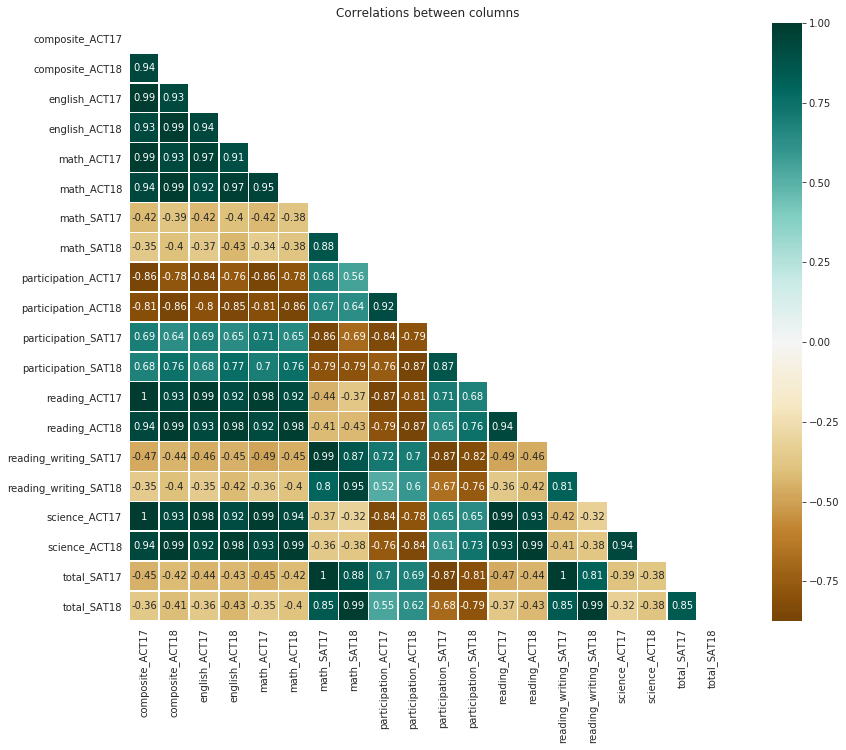

In [54]:
# This code is taken with minor modifications from https://seaborn.pydata.org/generated/seaborn.heatmap.html

# Establish size of figure.
plt.figure(figsize=(16,11))

# Calculate correlation
corr = final_df.corr()

# Set up mask to be "True" in the upper triangle.
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

# Plot correlation heatmap, while masking the upper triangle to be white.
with sns.axes_style("white"):
    sns.heatmap(corr, mask=mask, square=True, annot=True,center=0,linewidths=.5,cmap="BrBG")
    plt.title('Correlations between columns');

Based on the correlation data, we can observe a strong positive correlation between the final assessment of the test and its components, as well as between the subtests for 2017 and 2018. Strong positive correlation is between subtests of one test, which may indicate uniform complexity of subtests.

A fairly strong negative correlation is observed between the rate of state participation in the test and the final score, the higher the level of participation, the lower the final score for the state.

A weak negative correlation is observed between the subtests of different tests, as well as the rate of state participation in the tests.

#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [55]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels='scores'):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2,figsize=(12,11)) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column],edgecolor='w', color='#65a8a7',alpha=0.5,bins=20) # feel free to add more settings
        # Setting titles
        ax[i].set_title(list_of_titles[i],fontsize=16)
        # Setting x,y labels
        ax[i].set(xlabel=list_of_xlabels,ylabel='Frequency')
        # Setting grid
        ax[i].grid(b=True,color='#e6e4e2',linewidth=0.5,linestyle='--')
        # Setting mean lines and mean labels
        ax[i].axvline(dataframe[column].mean(), c='#8f7125', linestyle='dashed', linewidth=1)
        min_ylim, max_ylim = plt.ylim()
        ax[i].text(dataframe[column].mean(), max_ylim*0.9, 'Mean: {:.2f}'.format(dataframe[column].mean()))
    plt.tight_layout(pad=0.4, w_pad=1.5, h_pad=1.3)
    plt.show()

#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

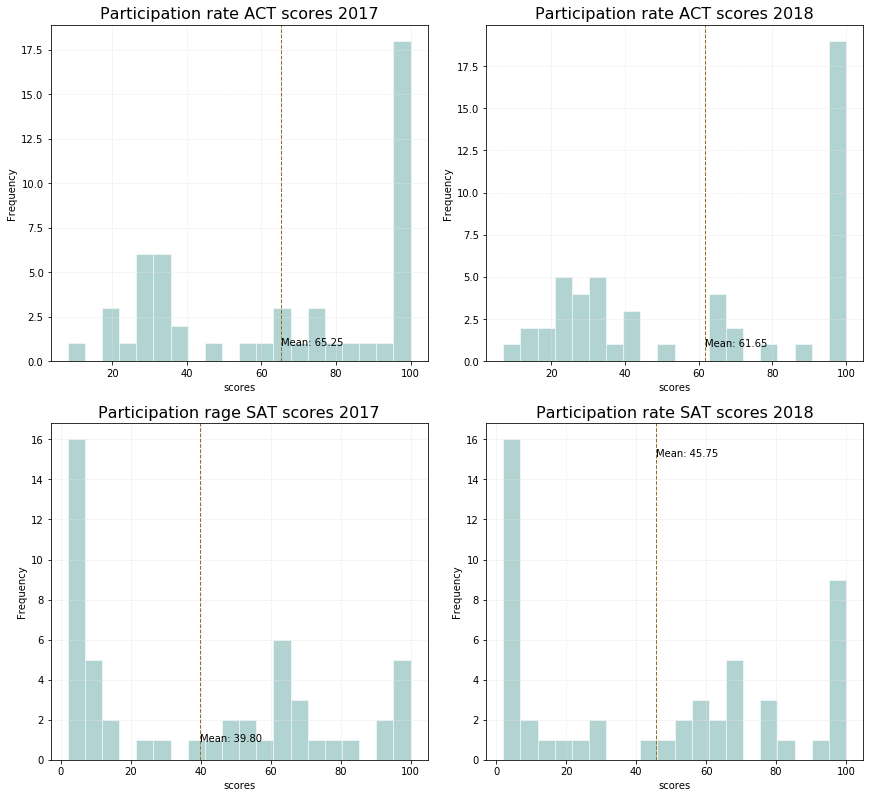

In [56]:
# Participation rates for SAT & ACT
subplot_histograms(final_df,['participation_ACT17', 'participation_ACT18', 'participation_SAT17',
       'participation_SAT18'],
        ['Participation rate ACT scores 2017', 'Participation rate ACT scores 2018', 
         'Participation rage SAT scores 2017', 'Participation rate SAT scores 2018']);

The participation rates of ACT and SAT in 2017 and 2018 years are not normally distributed. Most states have a high participation rate in ACT and lower participation rate in SAT. All histograms showed us multimodal distributions.

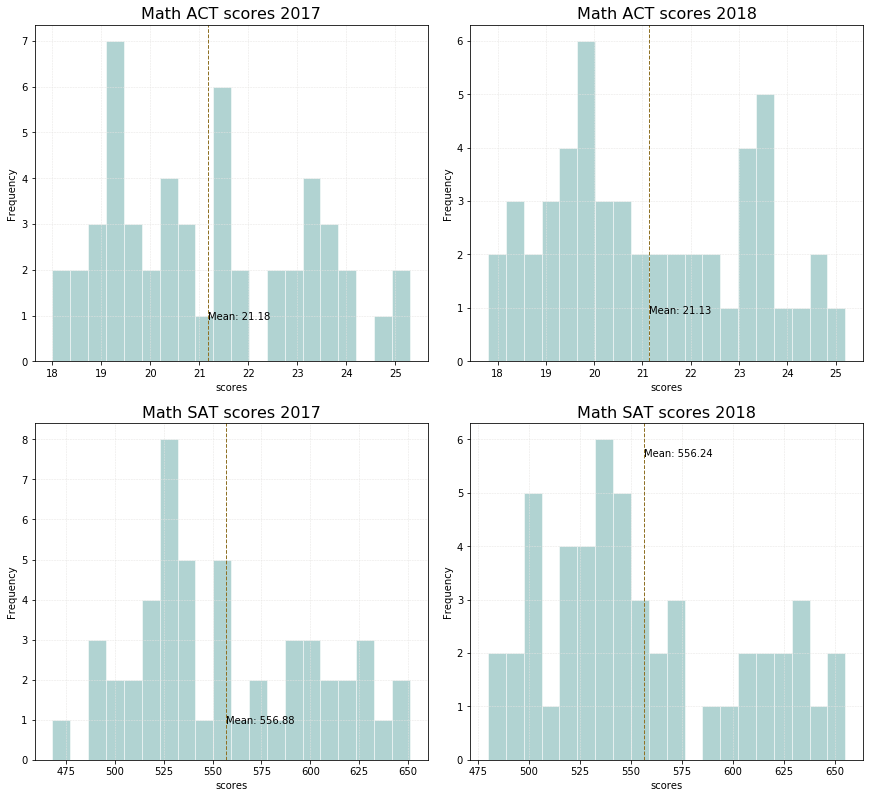

In [57]:
# Math scores for SAT & ACT
subplot_histograms(final_df,['math_ACT17', 'math_ACT18', 'math_SAT17', 'math_SAT18'],
                   ['Math ACT scores 2017', 'Math ACT scores 2018', 'Math SAT scores 2017', 
                    'Math SAT scores 2018'])

Distributions of math subtests are not normally distributed. ACT and SAT scores showed similar distributions by 2017 and 2018 years.

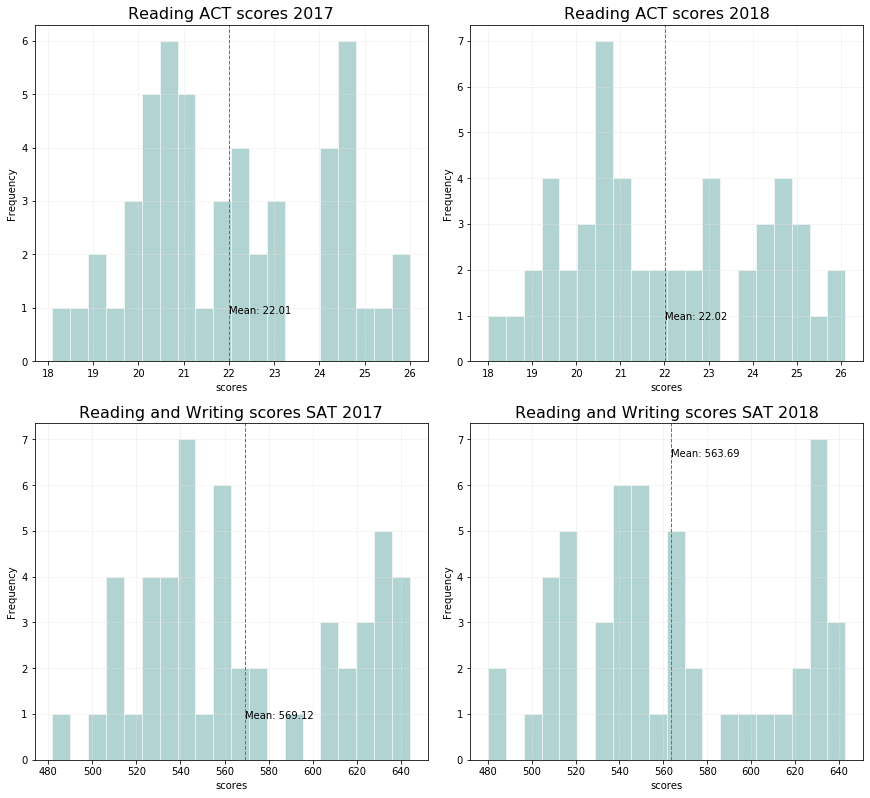

In [58]:
# Reading/verbal scores for SAT & ACT
subplot_histograms(final_df,['reading_ACT17', 'reading_ACT18', 'reading_writing_SAT17', 'reading_writing_SAT18'],
                   ['Reading ACT scores 2017', 'Reading ACT scores 2018',
       'Reading and Writing scores SAT 2017', 'Reading and Writing scores SAT 2018'])

Distributions of reading/verbal scores are not normally distributed. ACT and SAT scores showed similar distributions by 2017 and 2018 years.

#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


In [59]:
def subplot_scatter(dataframe, list_of_list_columns,figsize=(10,10)):
    """
    Plot a scatter plot of one column vs another column 
    
    Parameters:
    dataframe
    list_of_list_columns - nested list with lists with pairs of columns as x and y axis
    figsize - the custom size of a figure, 10x10 by default
    
    Returns:
    Scatter plot
    """
    nrows = int(np.ceil(len(list_of_list_columns)/2))
    fig, ax = plt.subplots(nrows=nrows, ncols=2,figsize=figsize)
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_list_columns): # Gives us an index value to get into all our lists
        ax[i].scatter(dataframe[column[0]],dataframe[column[1]],c='#65a8a7') # feel free to add more settings
        ax[i].set_title(f'''The relationship\n between {column[0].replace("_"," ").title()} and\n {column[1].replace("_"," ").title()} scores.''',
                        fontsize=16)
        ax[i].set(xlabel=column[0],ylabel=column[1])
        # Making a linear regression line on a scatter plot
        m, b = np.polyfit(dataframe[column[0]], dataframe[column[1]], 1)
        ax[i].plot(dataframe[column[0]], m*dataframe[column[0]] + b,c='#8f7125')
    #deleting empty subplot if list_of_list_columns is odd
    if len(list_of_list_columns)%2 !=0:
        fig.delaxes(ax[len(list_of_list_columns)]) 
    plt.tight_layout(pad=0.4, w_pad=2, h_pad=2)

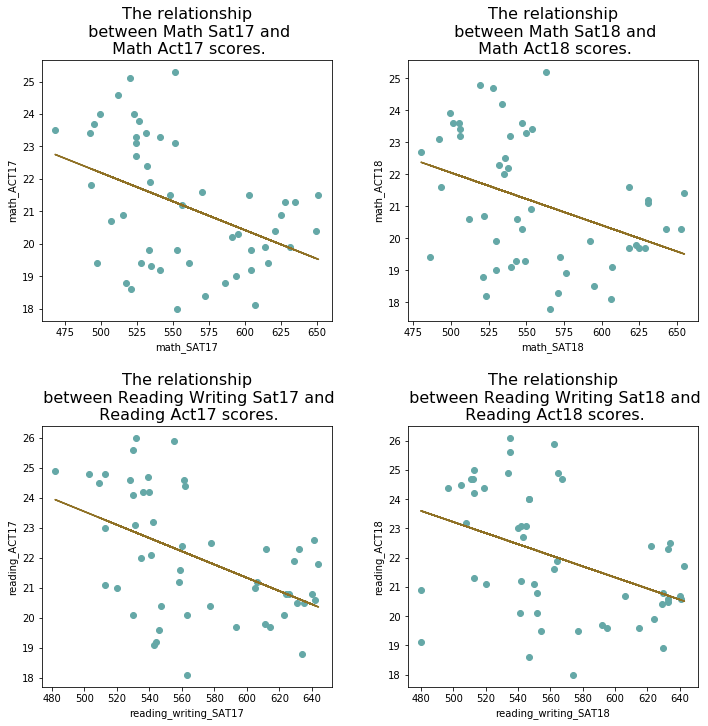

In [60]:
# SAT vs. ACT math scores for 2017
# SAT vs. ACT verbal/reading scores for 2017
subplot_scatter(final_df,[['math_SAT17','math_ACT17'],['math_SAT18','math_ACT18'],
['reading_writing_SAT17','reading_ACT17'],['reading_writing_SAT18','reading_ACT18']]);

The scatterplots illustrated the relationship between ACT and SAT subtests. We can observe weak negative correlation: the higher scores in ACT subtest, the lower scores in SAT in the state, but we can not make inference about tests complexity or state performance due to significant difference in participation rates.

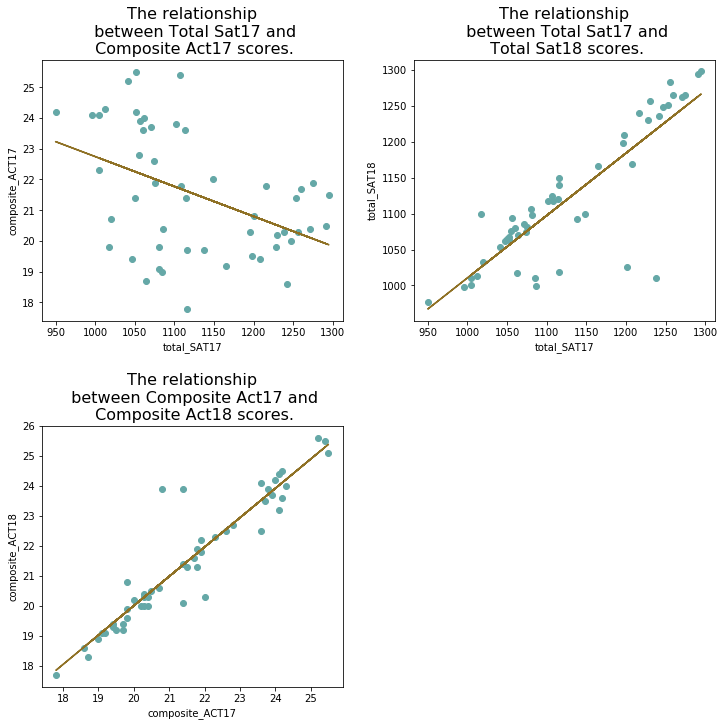

In [61]:
# SAT vs. ACT total/composite scores for 2017
# Total scores for SAT 2017 vs. 2018
# Composite scores for ACT 2017 vs. 2018
subplot_scatter(final_df,[['total_SAT17','composite_ACT17'],['total_SAT17', 'total_SAT18'],
                         ['composite_ACT17', 'composite_ACT18']]);

As it was stated above, SAT and ACT scores have a weak negative correlation. However, a strong positive correlation was observed between resulting scores in the same test in two years which can be an indicator of the same tests difficulty level in 2017 and 2018.

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

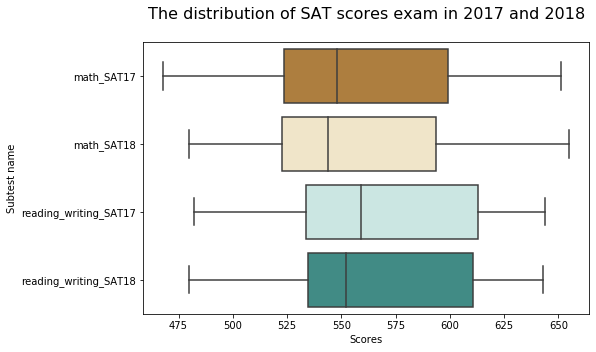

In [62]:
# Set list with columns SAT test
subplot_SAT = ['math_SAT17', 'math_SAT18', 'reading_writing_SAT17', 'reading_writing_SAT18']
fig = plt.figure(figsize=(8,5))
# Plot boxplot columns which are in list
ax = sns.boxplot(data=final_df[subplot_SAT],orient='h',palette="BrBG")
# Set x and y labels
ax.set(xlabel='Scores',ylabel='Subtest name')
# Set title
plt.title('The distribution of SAT scores exam in 2017 and 2018\n',fontsize=16);

The boxplots above illustrated that Reading and writing subtest (2017 year) has the highest median score. The biggest spread is in Math (2017) scores.

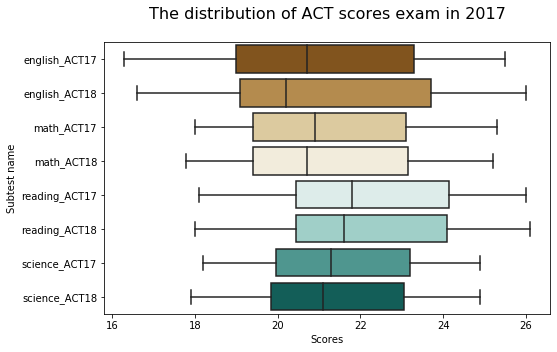

In [63]:
# Set list with columns for ACT subtest
subplot_ACT = ['english_ACT17','english_ACT18', 'math_ACT17', 'math_ACT18', 'reading_ACT17',
 'reading_ACT18', 'science_ACT17', 'science_ACT18']
fig = plt.figure(figsize=(8,5))
# Plot boxplot columns which are in list
ax = sns.boxplot(data=final_df[subplot_ACT],orient='h',palette="BrBG")
# Set x and y labels
ax.set(xlabel='Scores',ylabel='Subtest name')
# Set title
plt.title('The distribution of ACT scores exam in 2017\n',fontsize=16);

The distribution of ACT scores exam in 2017 showed that Reading subtest in 2017 has the higher median score and English subtest in 2018 the lowers median. The smallest spread showed Science subtest in 2017 and the highest spread was in English subtest in 2017.

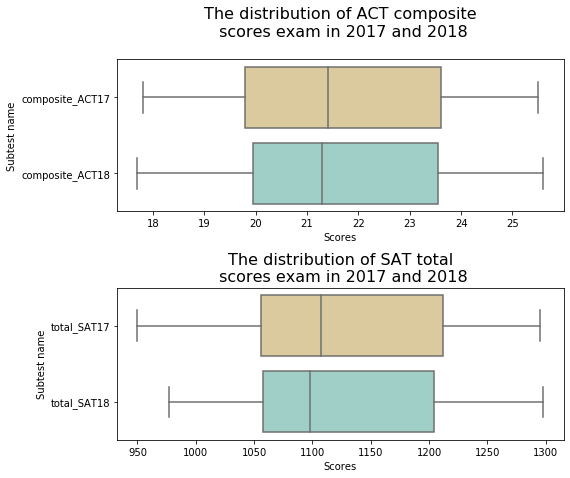

In [64]:
# Choose columns with scores for 2018 year
subplot_ACT_composite = ['composite_ACT17', 'composite_ACT18', ]
subplot_SAT_total = ['total_SAT17', 'total_SAT18']
fig, ax = plt.subplots(nrows=2, ncols=1,figsize=(8,7))
# Plot boxplot columns which are in list
sns.boxplot(data=final_df[subplot_ACT_composite],orient='h',palette="BrBG",ax=ax[0])
sns.boxplot(data=final_df[subplot_SAT_total],orient='h',palette="BrBG",ax=ax[1])
# Set x and y labels
ax[0].set(xlabel='Scores',ylabel='Subtest name')
ax[1].set(xlabel='Scores',ylabel='Subtest name')
plt.subplots_adjust(hspace = 0.5)
# Set title
ax[0].set_title('The distribution of ACT composite\n scores exam in 2017 and 2018\n',fontsize=16)
ax[1].set_title('The distribution of SAT total\n scores exam in 2017 and 2018',fontsize=16)
plt.show()

The boxplots of SAT total and ACT composite scores in 2017 and 2018 illustrated that in 2017 both tests' scores median was slightly higher than in 2018. ACT test showed similar spread while SAT in 2018 years demonstrated less low scores.

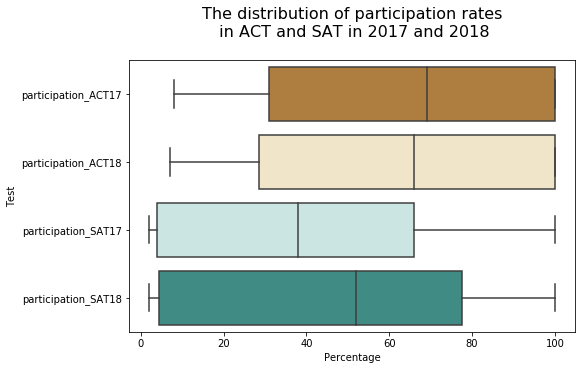

In [65]:
# Set list with columns for ACT subtest
participation = ['participation_ACT17','participation_ACT18',
                 'participation_SAT17','participation_SAT18']
fig = plt.figure(figsize=(8,5))
# Plot boxplot columns which are in list
ax = sns.boxplot(data=final_df[participation],orient='h',palette="BrBG")
# Set x and y labels
ax.set(xlabel='Percentage',ylabel='Test')
# Set title
plt.title('The distribution of participation rates\n in ACT and SAT in 2017 and 2018\n',fontsize=16);

Participation rates' boxplot revealed that while the spread of ACT and SAT in 2018 and 2018 were almost the same, SAT distribution was skewed right and ACT distribution was skewed left. ACT median was higher than SAT median participation rate.

#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

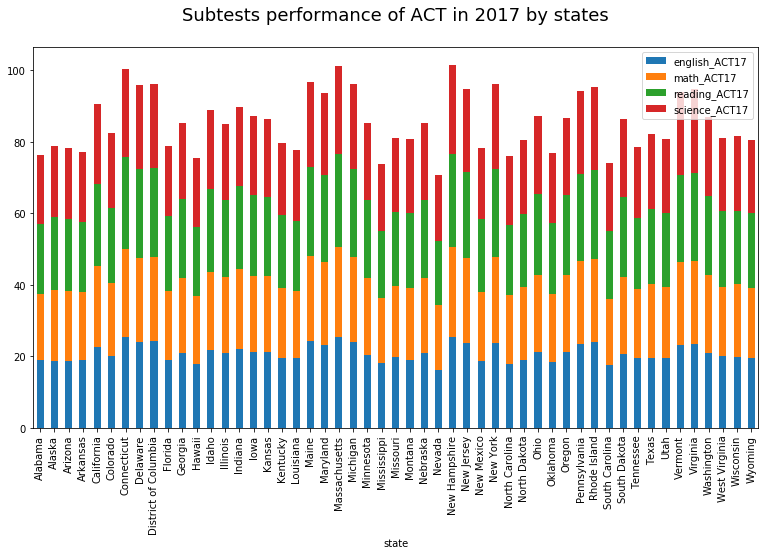

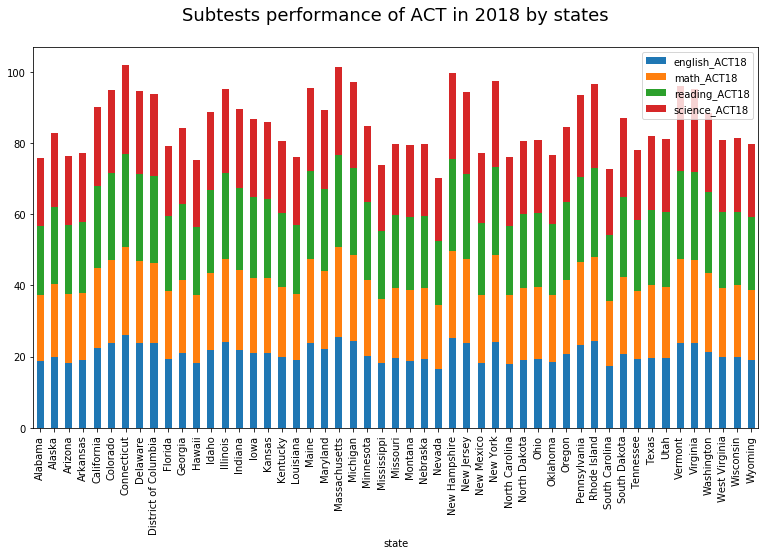

In [66]:
# Creating bar plot of subtests scores by states in ACT in 2017 and 2018
act_subtests = final_df.set_index('state')
act_subtests_2017 = act_subtests.loc[:,['english_ACT17',
       'math_ACT17', 'reading_ACT17', 'science_ACT17']]
act_subtests_2018 = act_subtests.loc[:,['english_ACT18',
       'math_ACT18', 'reading_ACT18', 'science_ACT18']]
ax_2017 = act_subtests_2017.plot(kind='bar',figsize=(13,7),stacked=True)
ax_2018 = act_subtests_2018.plot(kind='bar',figsize=(13,7),stacked=True)
ax_2017.set_title('Subtests performance of ACT in 2017 by states\n',fontsize=18)
ax_2018.set_title('Subtests performance of ACT in 2018 by states\n',fontsize=18)
plt.show()

The bar charts above demonstrated difference in performance by each state in 2017 and 2018 years. It is noticeable that there is not much difference in states' scores in two years. Connecticut, Massachusetts and New Hampshire showed the highest scores in both years, Nevada, South Carolina and Mississippi showed the lowest scores in both years. Overall each subtest contributes equally in total score, that means that there is no state with bad or great performance in only one subtest.

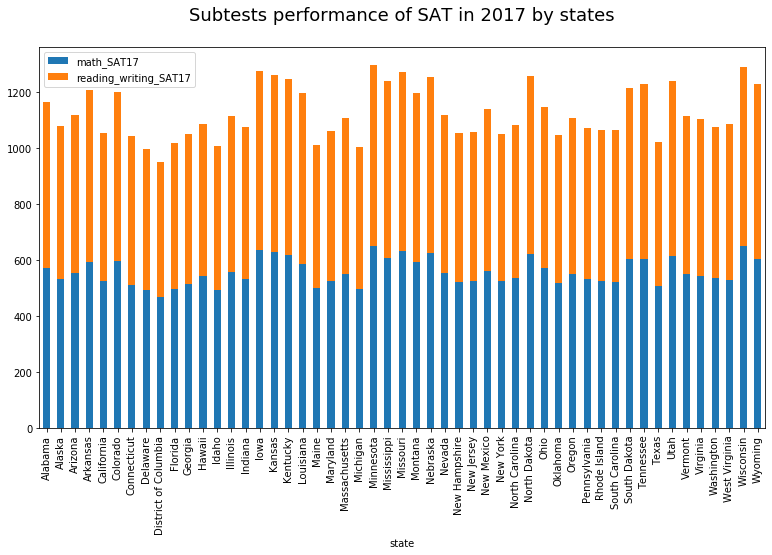

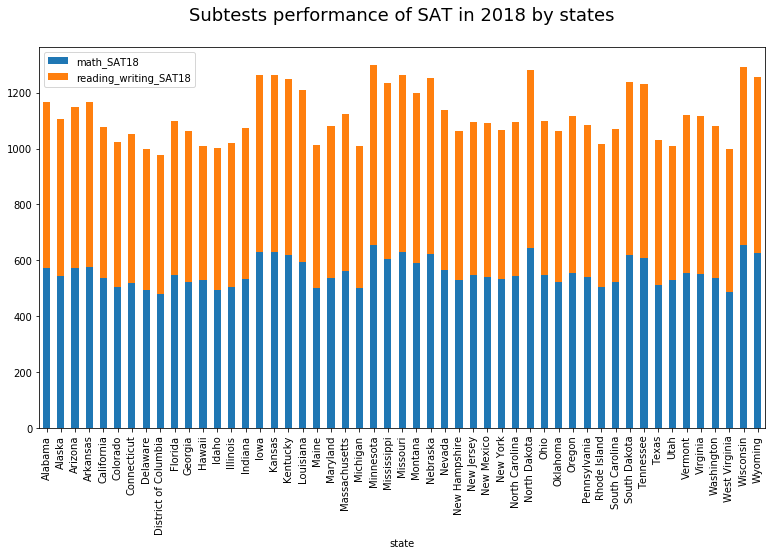

In [67]:
# Creating bar plot of subtests scores by states in SAT in 2017 and 2018
act_subtests = final_df.set_index('state')
sat_subtests_2017 = act_subtests.loc[:,['math_SAT17', 'reading_writing_SAT17']]
sat_subtests_2018 = act_subtests.loc[:,['math_SAT18', 'reading_writing_SAT18']]
ax_2017 = sat_subtests_2017.plot(kind='bar',figsize=(13,7),stacked=True)
ax_2018 = sat_subtests_2018.plot(kind='bar',figsize=(13,7),stacked=True)
ax_2017.set_title('Subtests performance of SAT in 2017 by states\n',fontsize=18)
ax_2018.set_title('Subtests performance of SAT in 2018 by states\n',fontsize=18)
plt.show()

From the above bar plots of SAT subtests the moderate difference can be observed: overall the states got slightly better result in 2018 in comparison with 2017. However Utah and West Virginia showed notable drop in 2018. This trend can be due to changes in the participation rate or weaker student preparation. As in ACT, SAT subtests contributes equally in total score, that means that there is no state with bad or great performance in only one subtest.

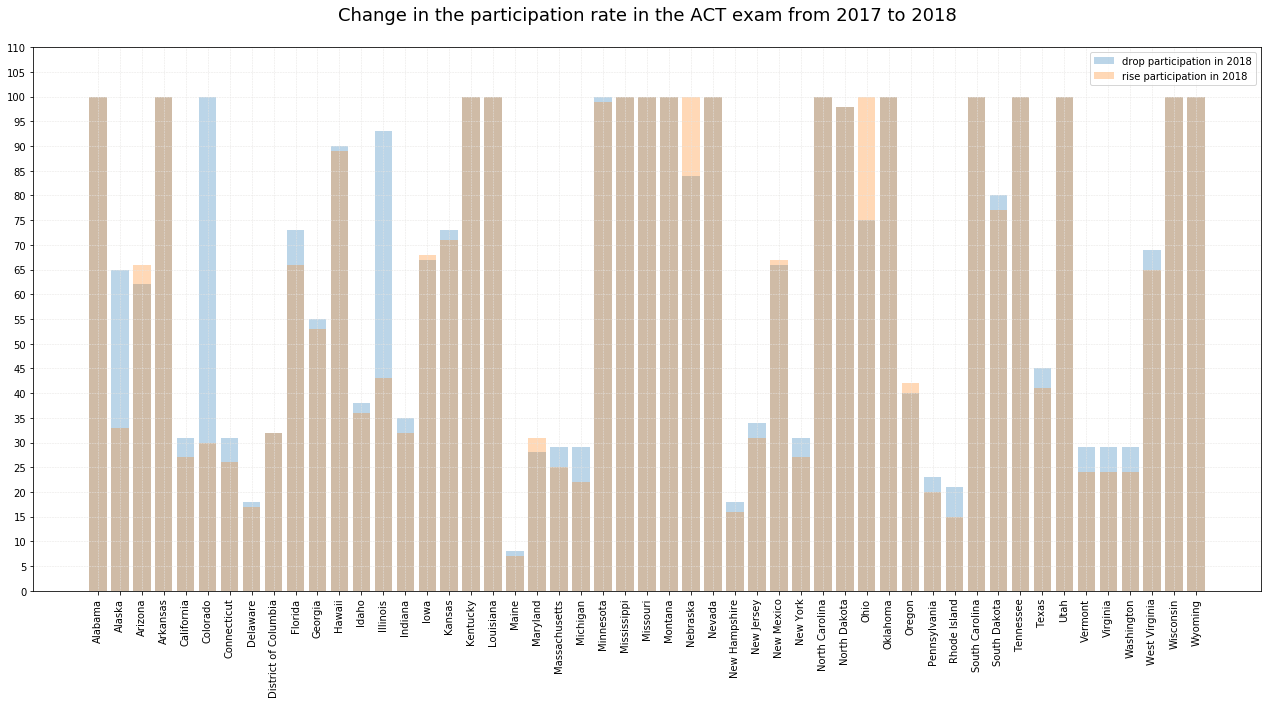

In [68]:
fig, ax = plt.subplots(figsize=(22,10))
plt.bar(final_df['state'], final_df['participation_ACT17'],label='drop participation in 2018',alpha=0.3)
plt.bar(final_df['state'], final_df['participation_ACT18'],label='rise participation in 2018',alpha=0.3)
plt.yticks(range(0,113,5))
plt.xticks(range(51), final_df['state'], rotation='vertical')
plt.grid(b=True,color='#e6e4e2',linewidth=0.5,linestyle='--')
plt.legend()
plt.title('Change in the participation rate in the ACT exam from 2017 to 2018\n',fontsize=18)
plt.show()

The bar graph 'Change in the participation rate in the ACT exam from 2017 to 2018' clearly illustrated that 27 states reduced their participation in the test. The most significant decline showed Alaska, Colorado and Illinois. 

7 states increased their participation in the test. The most notable rise was noted in Nebraska and Ohio.

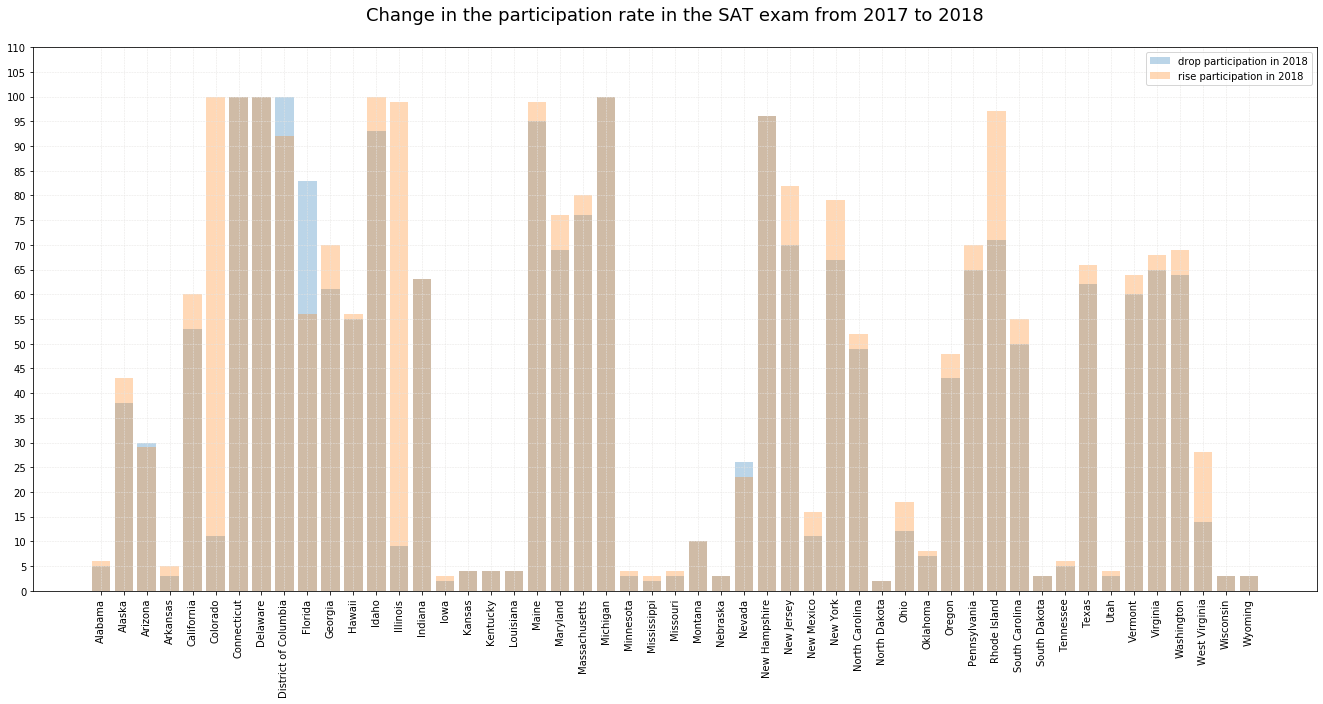

In [69]:
fig, ax = plt.subplots(figsize=(23,10))
plt.bar(final_df['state'], final_df['participation_SAT17'],label='drop participation in 2018',alpha=0.3)
plt.bar(final_df['state'], final_df['participation_SAT18'],label='rise participation in 2018',alpha=0.3)
plt.yticks(range(0,113,5))
plt.xticks(range(0,51), final_df['state'], rotation='vertical')
plt.grid(b=True,color='#e6e4e2',linewidth=0.5,linestyle='--')
plt.legend()
plt.title('Change in the participation rate in the SAT exam from 2017 to 2018\n',fontsize=18)
plt.show()

No handles with labels found to put in legend.


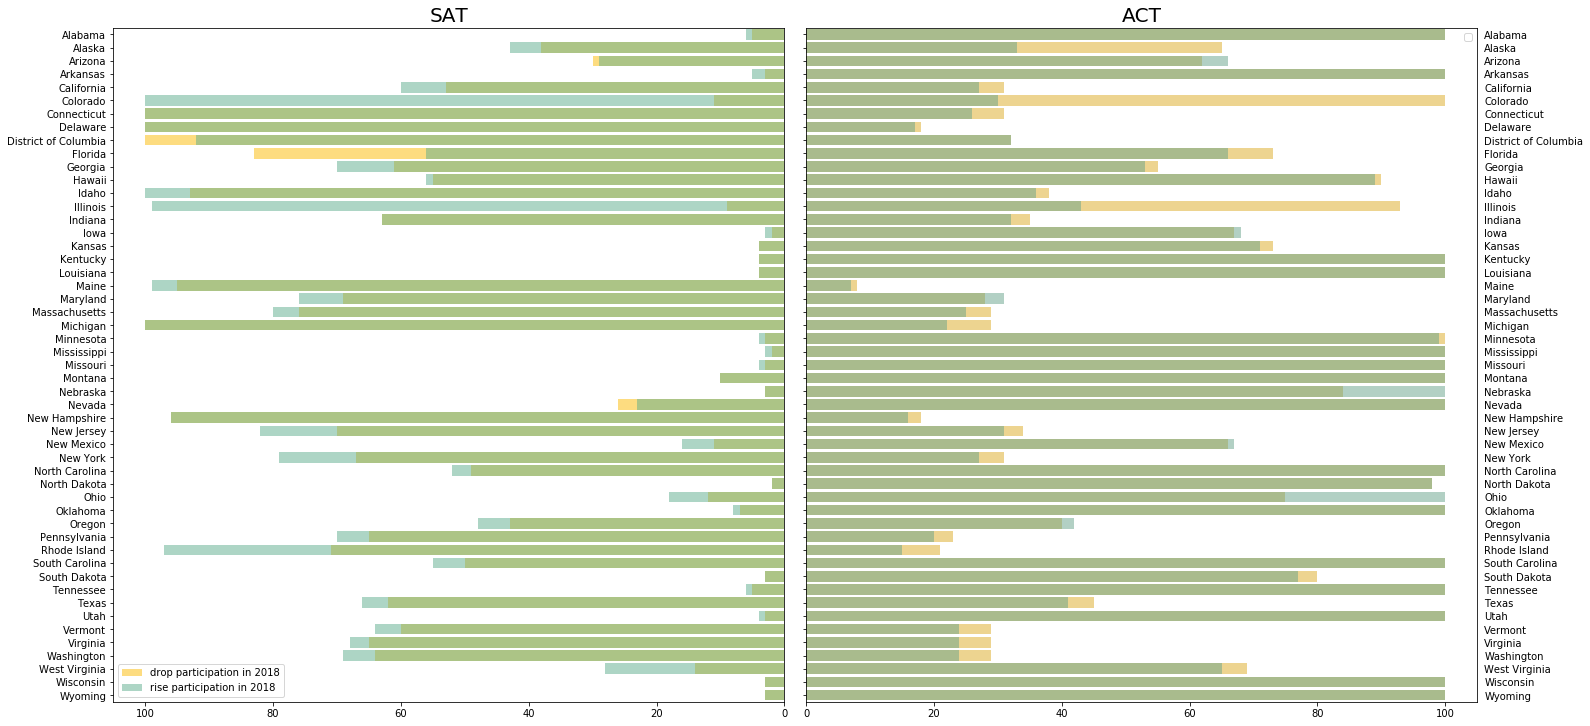

In [70]:
# Modified Peggy code (from group 5)
# SAT participation
fig, ax = plt.subplots(1,2,figsize=(22,10),sharey=True)
ax[0].barh(final_df['state'], final_df['participation_SAT17'],color='#fcba03',alpha=0.5,label='drop participation in 2018')
ax[0].barh(final_df['state'], final_df['participation_SAT18'],color='#5cad8d',alpha=0.5,label='rise participation in 2018')
ax[0].set_title('SAT',fontsize=20)
ax[0].set_xlabel('')
ax[0].set_ylabel(None)
ax[0].invert_xaxis()
ax[0].legend(loc='lower left',facecolor='white',fontsize=10)
# ACT participation
sns.barplot(y='state',x='participation_ACT17',data=final_df,color='#fcba03',ax=ax[1],orient='h',alpha=0.5)
sns.barplot(y='state',x='participation_ACT18',data=final_df,color='#5cad8d',ax=ax[1],orient='h',alpha=0.5)
ax[1].set_title('ACT',fontsize=20)
ax[1].set_xlabel('')
ax[1].set_ylabel(None)
plt.tick_params(labelright=True)
plt.tight_layout(pad=0.4, w_pad=1.5, h_pad=1.3)
plt.legend()
plt.show()

Change in the participation rate in the SAT exam from 2017 to 2018 was demonstrated on the bar chart above. Only 4 states showed drop: Arizona, District of Columbia, Florida and Nevada. Florida participation decreased most significantly. However, 33 states raised their participation rates. Colorado, Illinois and Rhode Island were the most noticeable ones. The graph clearly showed a great boost in the participation rate from 2017 to 2018.

In [71]:
# Choosing columns with result scores of the tests
result_score = final_df[['state','composite_ACT17', 'composite_ACT18','total_SAT17', 'total_SAT18']].copy()
# Setting maximum scores for ACT and SAT
max_score_ACT = 36
max_score_SAT = 1600
# Creating new columns with percentages of states' performance in tests from maximum scores of tests 
# to be able to compare tests' scores one to the other
result_score['success_rate_ACT_2017'] = round(final_df['composite_ACT17'] / max_score_ACT*100,0).astype('int')
result_score['success_rate_ACT_2018'] = round(final_df['composite_ACT18'] / max_score_ACT*100,0).astype('int')
result_score['success_rate_SAT_2017'] = round(final_df['total_SAT17'] / max_score_SAT*100,0).astype('int')
result_score['success_rate_SAT_2018'] = round(final_df['total_SAT18'] / max_score_SAT*100,0).astype('int')

# Filtering states with no difference between resulting scores in the same tests in both years
result_score_diff_both = result_score[(result_score['success_rate_ACT_2017'] != 
                                  result_score['success_rate_ACT_2018'])&
                                (result_score['success_rate_SAT_2017'] != 
                                 result_score['success_rate_SAT_2018'])]

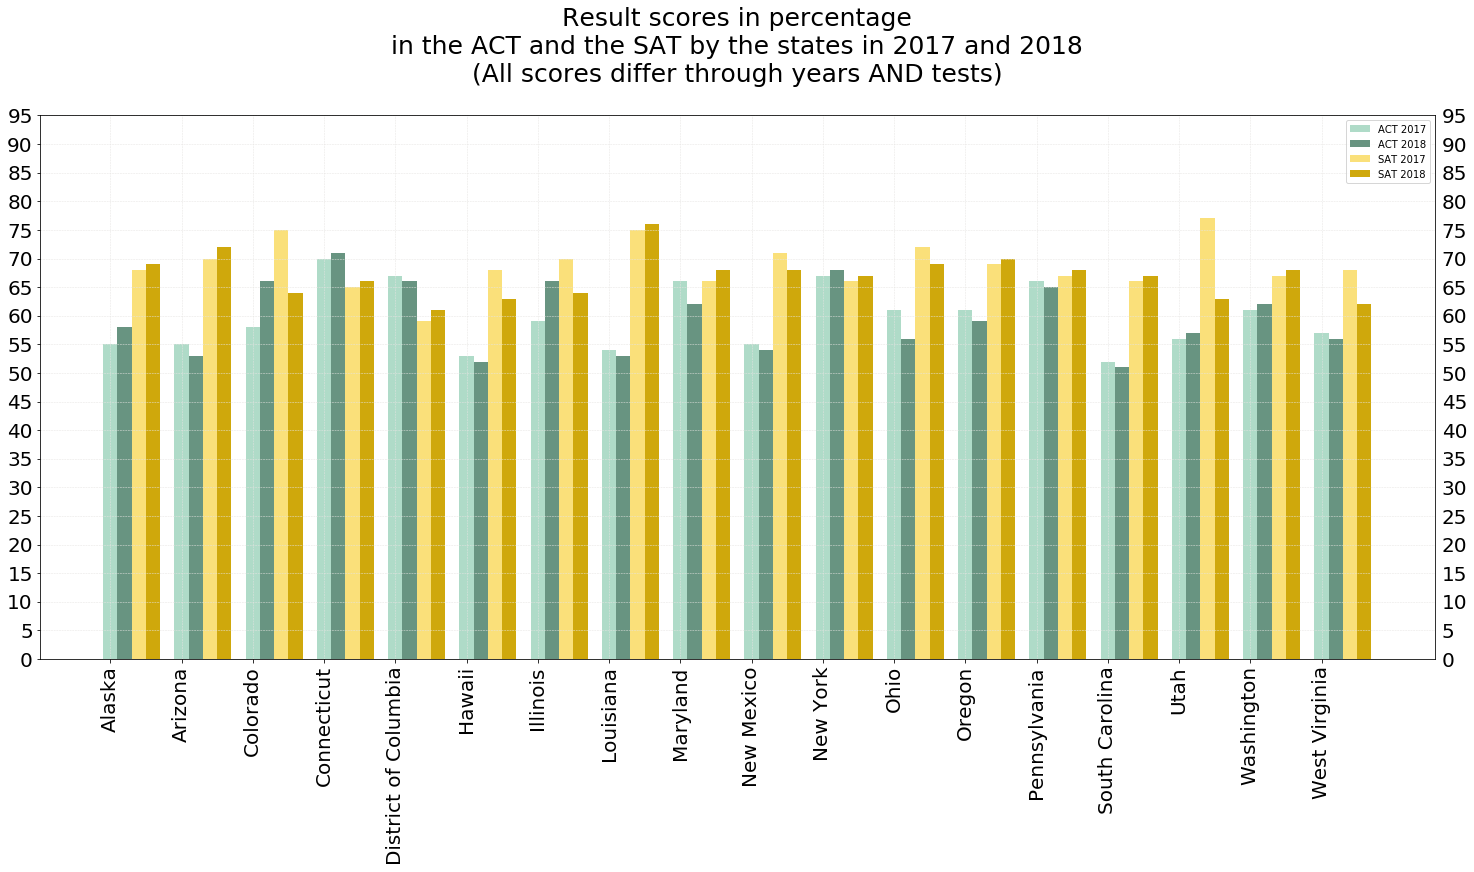

In [72]:
# Now we can compare perfomance in both tests by the states in 2017
f = plt.figure(figsize=(25,10))
ax = plt.subplot(1,1,1)
# Making bars stand apart
X = np.arange(len(result_score_diff_both['success_rate_SAT_2017']))
# Plotting bar chart
plt.bar(X + 0.0, result_score_diff_both['success_rate_ACT_2017'],label='ACT 2017',color = '#afdbc8', width = 0.2)
plt.bar(X + 0.2, result_score_diff_both['success_rate_ACT_2018'],label='ACT 2018',color = '#689481', width = 0.2)
plt.bar(X + 0.4, result_score_diff_both['success_rate_SAT_2017'],label='SAT 2017',color = '#fae07a', width = 0.2)
plt.bar(X + 0.6, result_score_diff_both['success_rate_SAT_2018'],label='SAT 2018',color = '#cfa80c', width = 0.2)
# Adding grid
plt.grid(b=True,color='#e6e4e2',linewidth=0.5,linestyle='--')
# Setting x,y ticks, adding ticks at the right side
plt.tick_params(labelright=True)
plt.yticks(range(0,100,5),fontsize=20)
plt.xticks(range(len(result_score_diff_both)), result_score_diff_both['state'], rotation='vertical',fontsize=20)
plt.legend()
plt.title(('''Result scores in percentage
in the ACT and the SAT by the states in 2017 and 2018
(All scores differ through years AND tests)\n'''),fontsize=25)
plt.show()

The bar chart illustrated comparison in both tests in 2017 and 2018 years in terms of percentages of the highest possible score. The comparison between SAT and ACT is still troubled due to difference in participation rate (for example Louisiana showed great difference in SAT and ACT performance, but the rate of participation in ACT is 100% while in SAT is less than 5%). 

Hovewer we can note that with small increase in SAT participation Utah made significant increase in SAT performance. Colorado, Illinois and West Virginia also performed much better in 2018 primarily by increasing in participation.

In [73]:
# The states with the insufficient or no difference between result scores in 2017 and 2018
result_score_no_diff = result_score[(result_score['success_rate_ACT_2017'] == 
                                  result_score['success_rate_ACT_2018'])&
                                (result_score['success_rate_SAT_2017'] == 
                                 result_score['success_rate_SAT_2018'])]
result_score_no_diff.set_index(result_score_no_diff['state'],inplace=True)
result_score_no_diff.iloc[:,1:5]

,composite_ACT17,composite_ACT18,total_SAT17,total_SAT18
state,,,,
Alabama,19.2,19.1,1165,1166
Georgia,21.4,21.4,1050,1064
Idaho,22.3,22.3,1005,1001
Kansas,21.7,21.6,1260,1265
Kentucky,20.0,20.2,1247,1248
Montana,20.3,20.0,1196,1198
Texas,20.7,20.6,1020,1032
Wisconsin,20.5,20.5,1291,1294


Interestingly, that thare are some states, which did not show any changes in scores in two years in both SAT and ACT.

#### (Optional): Using Tableau, create a choropleth map for each variable using a map of the US. 

Save this plot as an image file in an images directory, provide a relative path, and insert the image into notebook in markdown.

#### Change in the resulting scores of ACT and SAT from 2017 to 2018 by states in the USA

<img src="https://github.com/April-DS/General_Assembly_Projects/blob/master/project_1_SAT_ACT/images/Composite-Total.gif?raw=true">

#### Change in the participation rate of ACT and SAT from 2017 to 2018 by states in the USA

<img src="https://github.com/April-DS/General_Assembly_Projects/blob/master/project_1_SAT_ACT/images/Participation.gif?raw=true">

## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

#### According to Pearson’s second coefficient of skewness 
$$\frac{3*(mean – median) }{std}$$

If the mean is less than the median, the distribution is *negatively skewed (left-skewed).*

If the mean is greater than the median, the distribution is *positively skewed (right-skewed).*

The coefficient compares the sample distribution with a normal distribution. 

The larger the value, the larger the distribution differs from a normal distribution.

Results in standard deviations

In [74]:
descriptive_stat = final_df.describe().T
descriptive_stat.drop(columns=['count','25%','75%'],inplace=True)
descriptive_stat['skewness_in_std'] = 3*(descriptive_stat['mean'] - 
                                    descriptive_stat['50%'])/descriptive_stat['std']
descriptive_stat['skewness'] = descriptive_stat['skewness_in_std'].map(lambda x:
                                            'left' if x < 0 else 'right')

In [75]:
act_stat = descriptive_stat.iloc[[0,1,2,3,4,5,12,13,16,17]]
act_stat

,mean,std,min,50%,max,skewness_in_std,skewness
composite_ACT17,21.519608,2.020695,17.8,21.4,25.5,0.177574,right
composite_ACT18,21.486275,2.106278,17.7,21.3,25.6,0.265313,right
english_ACT17,20.931373,2.353677,16.3,20.7,25.5,0.294908,right
english_ACT18,20.988235,2.446356,16.6,20.2,26.0,0.966624,right
math_ACT17,21.182353,1.981989,18.0,20.9,25.3,0.427378,right
math_ACT18,21.125490,2.035765,17.8,20.7,25.2,0.627023,right
reading_ACT17,22.013725,2.067271,18.1,21.8,26.0,0.310156,right
reading_ACT18,22.015686,2.167245,18.0,21.6,26.1,0.575412,right
science_ACT17,21.450980,1.739353,18.2,21.3,24.9,0.260408,right
science_ACT18,21.345098,1.870114,17.9,21.1,24.9,0.393181,right


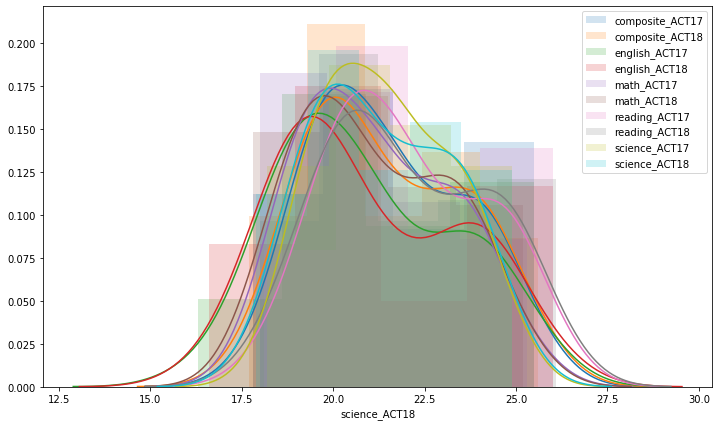

In [76]:
# Creating distributions for ACT scores in 2017 and 2018
fig = plt.figure(figsize=(12,7))
for column in descriptive_stat.index:
    if ('ACT' in column) & ('part' not in column):
        sns.distplot(final_df[column],label = column,hist_kws={'alpha': 0.2})
        plt.legend()
plt.show()

### ACT scores in 2017 and 2018
- ACT scores range from 16.3 to 26.1 with average standard deviation of 2.08.
- The Mean of scores is 21.41, median is 21.10.
- The smallest minimum score was 16.3 in English section in 2017. The highest minimum score was 18.2 in Science section in 2017.
- The smallest maximum scores were 24.9 in English section in 2017 and 2018. The highest minimum score was 26.1 in the Reading section in 2018.
- The least variation in the scores was in the Science section in 2017 (1.74 standard deviations).
- The greatest variation in the scores was in the English section in 2018 (2.45 standard deviation).

Most of the scores are noticeably bimodal and right-skewed.

In [77]:
sat_stat = descriptive_stat.iloc[[6,7,14,15,-2,-1]]
sat_stat

,mean,std,min,50%,max,skewness_in_std,skewness
math_SAT17,556.882353,47.121395,468.0,548.0,651.0,0.565498,right
math_SAT18,556.235294,47.772623,480.0,544.0,655.0,0.768346,right
reading_writing_SAT17,569.117647,45.666901,482.0,559.0,644.0,0.664660,right
reading_writing_SAT18,563.686275,47.502627,480.0,552.0,643.0,0.738040,right
total_SAT17,1126.098039,92.494812,950.0,1107.0,1295.0,0.619431,right
total_SAT18,1120.019608,94.155083,977.0,1098.0,1298.0,0.701596,right


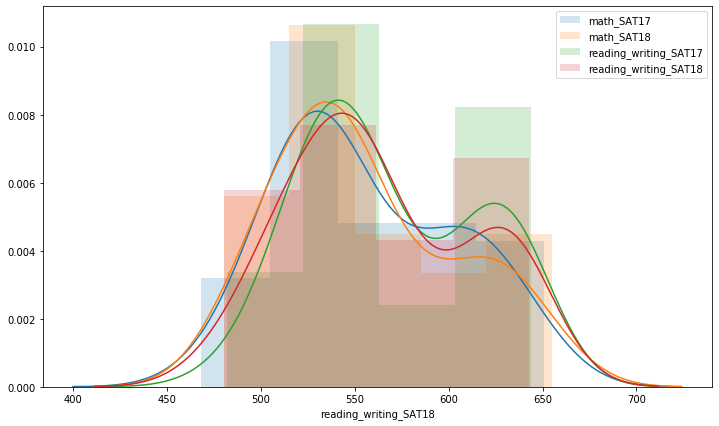

In [78]:
# Creating distributions for SAT subtests scores in 2017 and 2018
fig = plt.figure(figsize=(12,7))
for column in descriptive_stat.index:
    if ('SAT' in column) & ('part' not in column)&('total' not in column):
        sns.distplot(final_df[column],label = column,hist_kws={'alpha': 0.2})
        plt.legend()
plt.show()

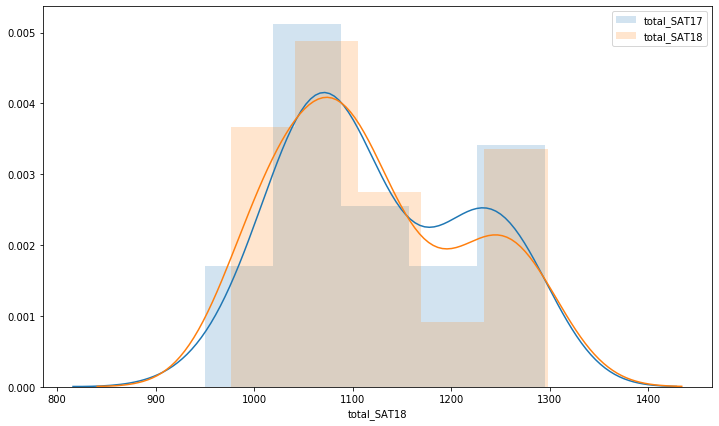

In [79]:
# Creating distributions for SAT total scores in 2017 and 2018
fig = plt.figure(figsize=(12,7))
for column in descriptive_stat.index:
    if 'total' in column:
        sns.distplot(final_df[column],label = column,hist_kws={'alpha': 0.2})
        plt.legend()
plt.show()

### SAT scores in 2017 and 2018
- SAT scores of subtests range from 468 to 655 with an average standard deviation of 47.015887.
- SAT total scores range from 950 to 1298 with an average standard deviation of 93.324947.
- The Mean of scores is 1123.06, the median is 1102.50.
- Data vary slightly in all sections compared to each other.
- The least variation in the scores was in the Evidence-Based Reading and Writing section in 2017 (45.7 standard deviations).

Scores in all sections are noticeably bimodal and right-skewed.

In [80]:
participation_stat = descriptive_stat.iloc[8:12]
participation_stat

,mean,std,min,50%,max,skewness_in_std,skewness
participation_ACT17,65.254902,32.140842,8.0,69.0,100.0,-0.349564,left
participation_ACT18,61.647059,34.080976,7.0,66.0,100.0,-0.383170,left
participation_SAT17,39.803922,35.276632,2.0,38.0,100.0,0.153409,right
participation_SAT18,45.745098,37.314256,2.0,52.0,100.0,-0.502883,left


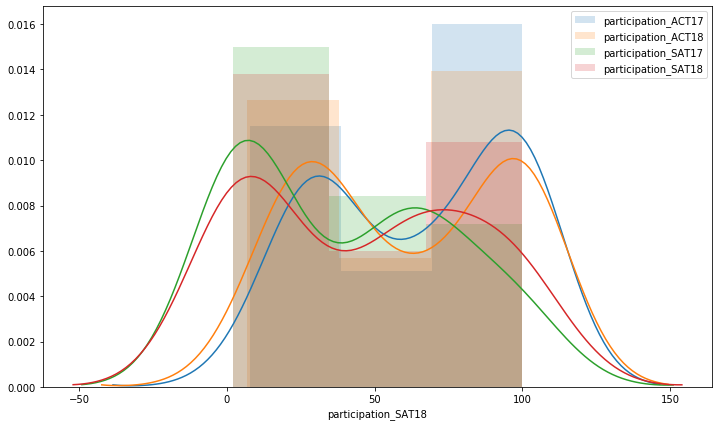

In [81]:
# Creating distributions for participation rate of ACT and SAT in 2017 and 2018
fig = plt.figure(figsize=(12,7))
for column in descriptive_stat.index:
    if 'part' in column:
        sns.distplot(final_df[column],label = column,hist_kws={'alpha': 0.2})
        plt.legend()
plt.show()

### Participation rate at SAT and ACT in 2017 and 2018
- Participation rate range from 2% (SAT 2017) to 100% with an average standard deviation of 34.7%.
- The Mean of the participation rate is 53.1, the median is 56.25.

Distributions of participation rate are noticeably bimodal and left-skewed for ACT and SAT in 2018 and ACT in 2017.
Distribution of participation rate is noticeably bimodal and right-skewed for SAT in 2017.



#### Distributions in the data

In this dataset, each data represents a sample from a population.                        
For example, for ACT math test:
- Population: the test results of all the students who take this test, nation-wide.
- Population mean: is the national average of ACT math test (total scores/total no. of test takers) 
- Sample: the state means of ACT math test. We have 51 samples (51 states)

***According to CLT, we generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?***

Answer: No, we do not. Most of the distributions are skewed right and some left, all the distributions are in varying degrees bimodal.

Does This Assumption Hold for:
    - Math
    - Reading
    - Rates
Explain your answers for each distribution and how you think this will affect estimates made from these data.

Answer: As it was stated above, this assumption does not hold for any part of our data. 

I assume that the scores and participation rates of the population are not normally distributed and our samples were not chosen randomly.

#### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 

##### Does it make sense to conduct statistical inference given these data specifically? 

Why or why not?

*(think about granularity, aggregation, the relationships between populations size & rates...consider the actually populations these data describe in answering this question)*

Answer:

As a scatterplot and a correlational heatmap showed us, the relationship between SAT and ACT participation rates in 2017 and 2018 years have negative correlations. It means that when the participation rate in one test increase, the participation rate in another test decrease.
However, we should take into account the difference in sample size in each state which differ significantly. According to the above, we can not conduct inference accurately.

##### Is it appropriate to compare *these* specific SAT and ACT math scores  - can we say students with higher SAT math score is better than those with lower ACT math score, or vice versa?

Why or why not?

Answer:

SAT and ACT math scores have a weak negative correlation coefficient, the tests scores were measured in different scales. So, we can assume that the higher score the better students in math in each test but can not make inference about performance between tests.

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

As we found out above, our data is not normally distributed and we do not have random samples. Hence, we can not conduct the methods we discussed in class.

## Colorado, Illinois and North Carolina participation trends

Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

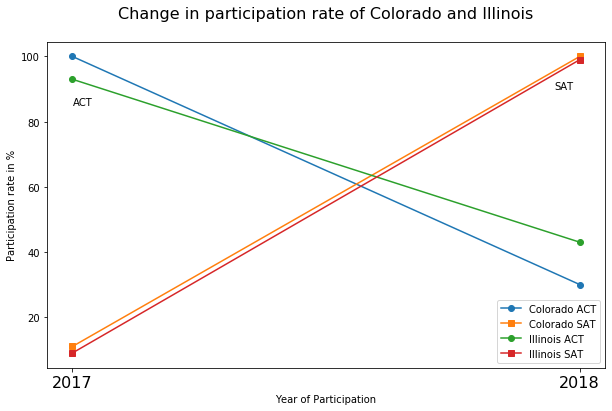

In [82]:
# Plotting changes in participation rate of Colorado and Illinois
change_in_participation = final_df[(final_df['state']=='Colorado')|(final_df['state']=='Illinois')]
change_in_participation[['participation_ACT17','participation_ACT18','participation_SAT17','participation_SAT18']]
x = [2017,2018]
fig, ax = plt.subplots(figsize=(10,6))
plt.plot(x,change_in_participation[['participation_ACT17',
                    'participation_ACT18']].iloc[0],marker='o',label='Colorado ACT')
plt.plot(x,change_in_participation[['participation_SAT17',
                    'participation_SAT18']].iloc[0],marker='s',label='Colorado SAT')
plt.plot(x,change_in_participation[['participation_ACT17',
                    'participation_ACT18']].iloc[1],marker='o',label='Illinois ACT')
plt.plot(x,change_in_participation[['participation_SAT17',
                    'participation_SAT18']].iloc[1],marker='s',label='Illinois SAT')
plt.xticks((2017,2018),fontsize=16)
plt.xlabel('Year of Participation')
plt.ylabel('Participation rate in %')
plt.title('Change in participation rate of Colorado and Illinois\n',fontsize=16)
plt.legend()
plt.text(x=2017,y=85,s='ACT')
plt.text(x=2017.95,y=90,s='SAT')
plt.show()

In 2016 [Colorado and the College Board partnered to administer the SAT as the state’s accountability exam](https://www.testive.com/colorado-sat-change-2017/). Illinois also moves ahead with new testing plan, [replacing ACT with SAT](https://www.chicagotribune.com/news/ct-illinois-chooses-sat-met-20160211-story.html)

This fully explains the dramatic changes in participation rates in both states.

In [83]:
high_participation = final_df[['state','participation_ACT17','participation_ACT18',
                                'participation_SAT17','participation_SAT18']].copy()
high_participation = final_df[(final_df['state']=='North Carolina')]
high_participation[['state','participation_ACT17','participation_ACT18','participation_SAT17','participation_SAT18']]

,state,participation_ACT17,participation_ACT18,participation_SAT17,participation_SAT18
33,North Carolina,100.0,100.0,49.0,52.0


The rate of participation of North Carolina state in both tests is high in 2017 and 2018 years. According to the [website](https://www.collegesimply.com/guides/low-sat-score/north-carolina/) where can be find required scores many universities accept both ACT and SAT
Also, The [College Foundation of North Carolina (CFNC)](https://resources.finalsite.net/images/v1532539578/metrolinachristianorg/sr67uwjjogzvmawgnnld/ACT_SAT_practice_resources.pdf) is offering comprehensive FREE test preparation courses for the SAT and ACT, what can be one of the causes the high participation rate in tests.


In [84]:
high_participation = final_df[(final_df['state']=='Ohio')]
high_participation[['state','participation_ACT17','participation_ACT18','participation_SAT17','participation_SAT18']]

,state,participation_ACT17,participation_ACT18,participation_SAT17,participation_SAT18
35,Ohio,75.0,100.0,12.0,18.0


[Ohio](https://blog.prepscholar.com/which-states-require-the-sat) is a state which must meet threshold scores on either the SAT or ACT. We can see significant increas in ACT participation and small increase in SAT participation rate. It means that the Ohio can be a potential client for SAT test.

## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state. Are there additional data you desire that would better inform your investigations?

Based on the analysis carried out, it can be noted that the overall participation rate for ACT is significantly higher than for SAT. At the same time, rates from 2017 to 2018 have changed. While ACT showed a slight decline, SAT showed a good increase in participation. SAT demonstrated good policy due to which 33 states increased in their participation rates and only 4 states showed a drop. For example, states such as Illinois and Colorado have grown significantly in participation because SAT has become mandatory for students entering universities.

It shows that **partnering** with states' school administrators and universities is the most effective way to increase participation.

Taking North Carolina state as an example, we can observe a high participation rate in both tests in 2017 and 2018 years. The reasons for this can be the acceptance of both tests and free test preparation courses. The same strategy can be implemented for other states which accept both tests. 

Ohio can be a potential client for SAT test because the state accepts both tests and [form 2017](https://www.dispatch.com/news/20170228/ohio-schools-must-now-give-act-or-sat-to-all-juniors) students don’t have to pay test's fee. Often students take two tests because they can take one for free, so attracting students in a given state can not only increase participation but also **draw conclusions on the content of the test** (there is a possibility to compare the difficulty of the test and verify the grading scale).

The methods listed above, such as partnerships with school and university administrations and attracting students in states where payment is cancelled and both tests are accepted, must be combined with:
- Active SMM on the Internet, promotion of articles on the benefits of SAT compared to ACT.
- Promotion of videos with a detailed description of how to prepare for the test.
- Using platforms such as Coursera and EdX.
- Retain partnership with Khan Academy.
- Establishing new scholarships for students who can creatively share their positive experience of - passing the test on social networks.
- Cost reduction or cancellation for low-income students.


Recommendations for further research:
- Explore the states of Arizona, District of Columbia, Florida and Nevada in more detail in connection with a decrease in the participation rate.
-  Analyse the choice of the students in those states where they can take both tests. Collect data on the desired universities for admission, school performance, demographic characteristics.
- Analyze the performance of the test by students who passed both tests. To study the features of assessment, the complexity of the test and subtests.